<h1>Midterm Exam</h1>
<hr>
<h2>Analyst: Reniel P. Bontoc</h2>

<h1>Libraries</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<h1>Converting Datas Into Dataframe</h1>

In [2]:
crimes = pd.read_csv('datasets//Chicago_Crimes.csv')
crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


<h1>Adjusting Data from Date</h1>

In [3]:
# Step 1: Convert to string only if not null
crimes['Date'] = crimes['Date'].astype(str)
# Step 2: Replace '/' with '-' safely
# Step 3: Strip whitespace
crimes['Date'] = crimes['Date'].apply(lambda x: x.strip() if pd.notnull(x) else x)
# Step 4: Convert to datetime
crimes['Date'] = pd.to_datetime(crimes['Date'], dayfirst=True, errors='coerce')

<h1>Filling Null Values</h1>

In [4]:
crimes['Location Description'] = crimes['Location Description'].fillna('unaccounted')
crimes['Community Area'] = crimes['Community Area'].fillna(crimes['Community Area'].mode()[0])
crimes['X Coordinate'] = crimes['X Coordinate'].fillna(crimes['X Coordinate'].mode()[0])
crimes['Y Coordinate'] = crimes['Y Coordinate'].fillna(crimes['Y Coordinate'].mode()[0])
crimes['Longitude'] = crimes['Longitude'].fillna(crimes['Longitude'].mode()[0])
crimes['Latitude'] = crimes['Latitude'].fillna(crimes['Latitude'].mode()[0])
crimes['Location'] = crimes['Location'].fillna('unaccounted')

crimes.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

<h1>Data Analysis: Chicago Crime Data Analysis (2024–2025)</h1>
<hr>
<h2>1. Annual Crime Distribution</h2>

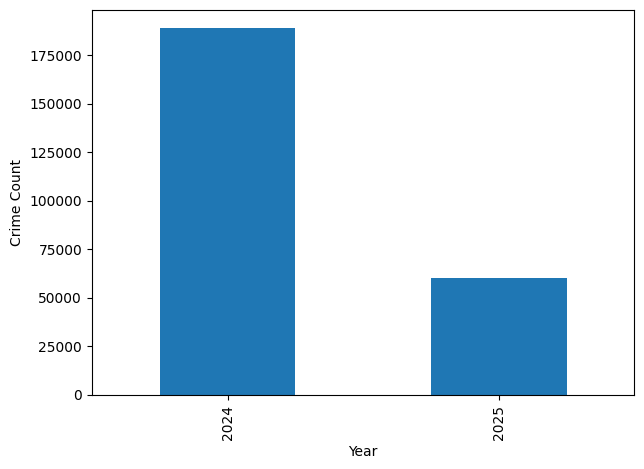

In [5]:
crimes.groupby("Year")["ID"].count().plot(kind="bar", figsize=(7,5))
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.show()

<h2>Insight:</h2>
<h3>The yearly trend shows that 2024 recorded the highest number of reported crimes. Although 2025 has fewer cases, this is most likely due to incomplete data for the year. Overall, the annual crime levels remain consistently high, reflecting persistent safety challenges in the city. </h3>
<hr>

<h2>2. Seasonal Crime Patterns</h2>

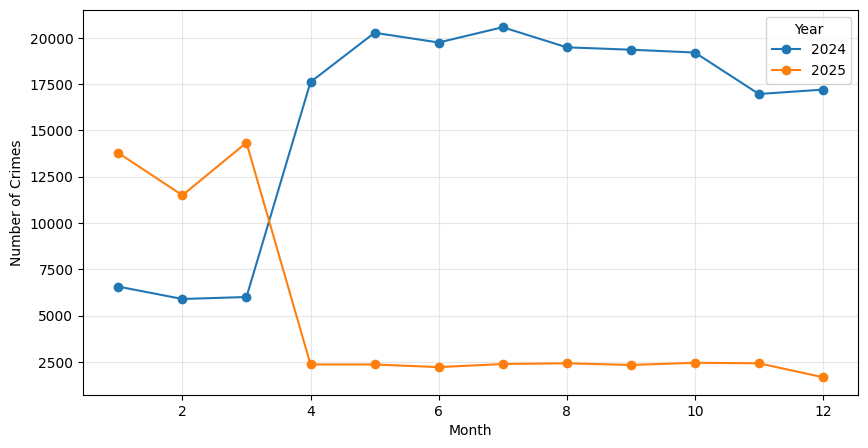

In [6]:
crimes["Month"] = crimes["Date"].dt.month

monthly = crimes.groupby(["Year","Month"]).size().unstack(level=0)

monthly.plot(marker="o", figsize=(10,5))
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.grid(alpha=0.3)
plt.show()

<h2>Insight:</h2>
<h3>The seasonal analysis shows that crime levels generally rise during the summer months, particularly between June and August. In contrast, winter months tend to record fewer cases. This recurring pattern suggests that seasonal and social factors may play a role in influencing crime activity. </h3>
<hr>

<h2>3. Leading Crime Categories in Chicago</h2>

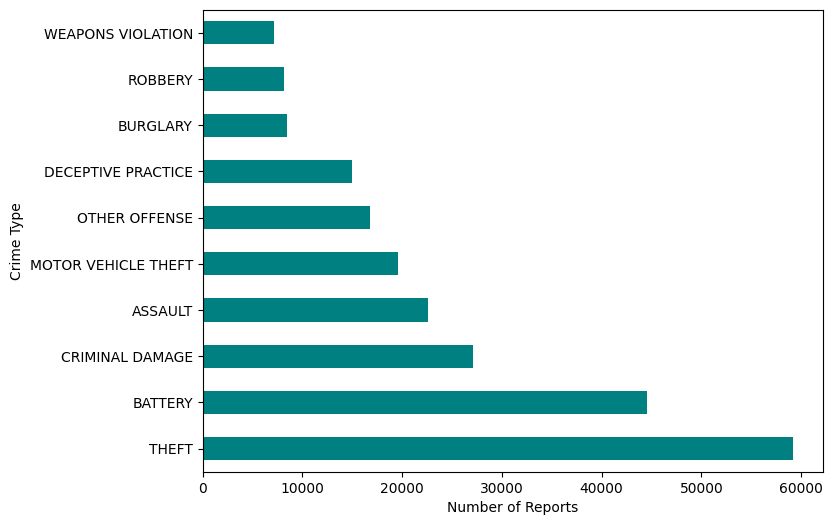

In [7]:
top_crimes = crimes["Primary Type"].value_counts().head(10)

top_crimes.plot(kind="barh", figsize=(8,6), color="teal")
plt.xlabel("Number of Reports")
plt.ylabel("Crime Type")
plt.show()

<h2>Insight:</h2>
<h3>The breakdown of leading crime categories highlights theft as the most dominant type of crime, followed by assault and battery. This indicates that both property crimes and personal safety incidents are critical issues in Chicago, while other categories such as drug-related offenses and weapons violations, though less frequent, remain significant.</h3>
<hr>

<h2>4. Arrest Outcomes in Reported Crimes</h2>

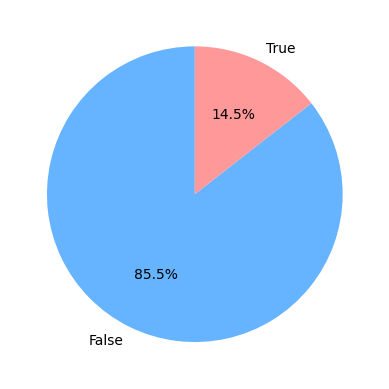

In [8]:
counts = crimes["Arrest"].value_counts()
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", 
        colors=["#66b3ff","#ff9999"], startangle=90)

plt.show()

<h2>Insight:</h2>
<h3>The arrest outcomes chart shows that a relatively small fraction of crimes result in arrests. In most reported incidents, no suspect is apprehended, highlighting a persistent challenge for law enforcement in resolving a large volume of criminal cases.</h3>
<hr>

<h2>5. Top Crime Hotspots by Location</h2>

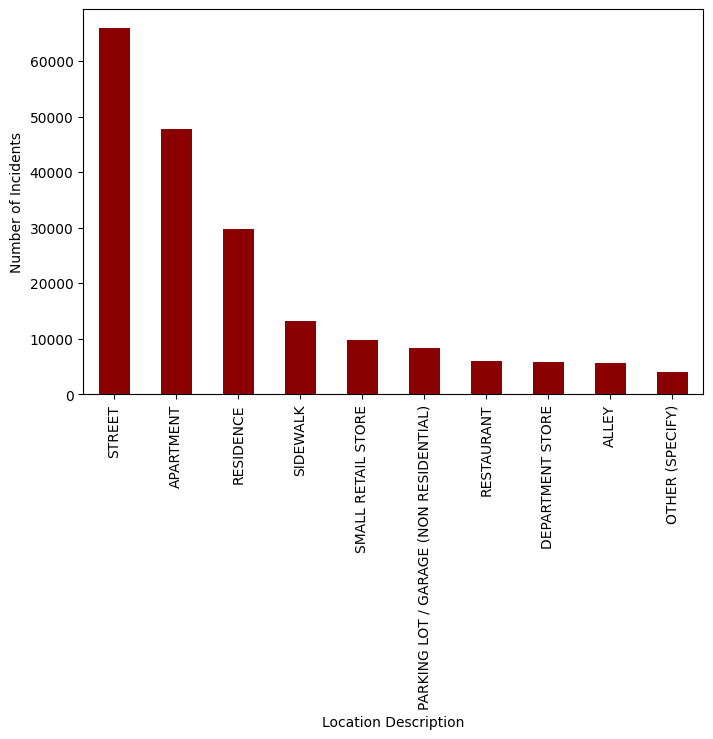

In [9]:
loc = crimes["Location Description"].value_counts().head(10)
loc.plot(kind="bar", figsize=(8,5), color="darkred")
plt.ylabel("Number of Incidents")
plt.show()

<h2>Insight:</h2>
<h3>The analysis of location descriptions reveals that most crimes happen on the street, followed closely by residential areas. Other common hotspots include apartments, sidewalks, and commercial spaces. This shows that both public and private areas are highly vulnerable to crime, emphasizing the need for diverse safety measures.</h3>
<hr>

<h2>6. Arrest Trends Over the Years</h2>

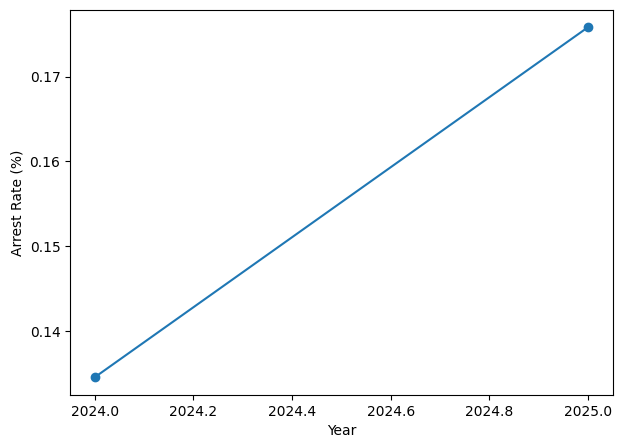

In [10]:
arrest_trend = crimes.groupby("Year")["Arrest"].mean()
arrest_trend.plot(marker="o", figsize=(7,5))
plt.ylabel("Arrest Rate (%)")
plt.show()

<h2>Insight:</h2>
<h3>The arrest trend shows a gradual decline over recent years, meaning that fewer reported incidents lead to arrests. This could be due to increased complexity in solving crimes, limited resources, or a growing number of cases overwhelming law enforcement.</h3>
<hr>

<h2>7. Domestic vs Non-Domestic Incidents</h2>

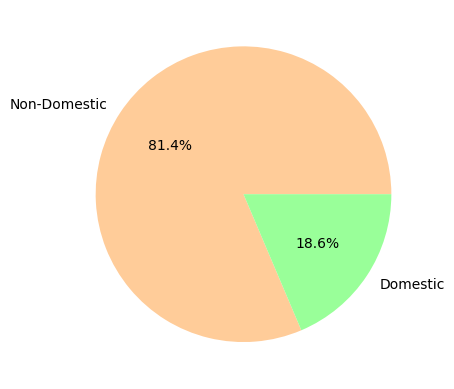

In [11]:
counts = crimes["Domestic"].value_counts()
plt.pie(counts, labels=["Non-Domestic","Domestic"], autopct="%1.1f%%",
        colors=["#ffcc99","#99ff99"])
plt.show()

<h2>Insight:</h2>
<h3>While the majority of crimes are non-domestic in nature, a significant fraction still occurs within households or close personal relationships. This highlights the dual challenge faced by law enforcement: tackling public crime while also addressing sensitive domestic issues.</h3>
<hr>

<h2>8. Top 8 Locations Where Crimes Are Reported</h2>

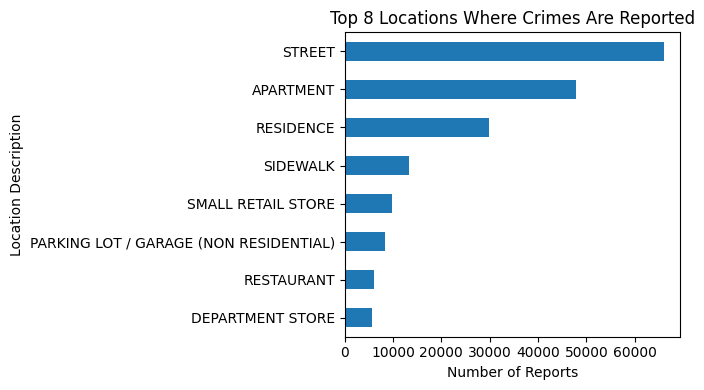

In [12]:
# 2. Top 8 Location Descriptions
top_locs = crimes['Location Description'].value_counts().head(8)
top_locs.plot(kind='barh', figsize=(7,4))
plt.title("Top 8 Locations Where Crimes Are Reported")
plt.xlabel("Number of Reports")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

<h2>Insight:</h2>
<h3>Streets and residential-related descriptions dominate the top locations. The horizontal layout emphasizes relative differences; the highest location typically represents common public spaces where reporting occurs.</h3>
<hr>

<h2>9. Top 10 Crime Types (Proportion of top-10)</h2>

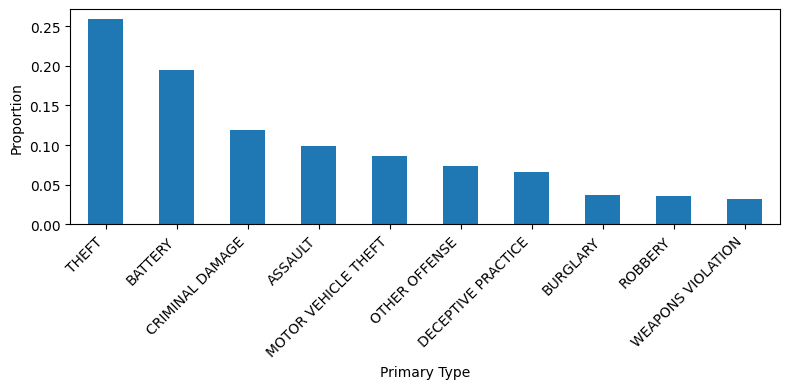

In [13]:
top_types = crimes['Primary Type'].value_counts().head(10)
(top_types / top_types.sum()).plot(kind='bar', figsize=(8,4))
plt.ylabel("Proportion")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h2>Insight:</h2>
<h3>Among the top 10 crime types, theft and assault-related categories typically account for the bulk. Showing proportions (normalized) clarifies how dominant the leading types are relative to other common offenses.</h3>
<hr>

<h2>10. Top Community Areas: Counts stacked by Arrest</h2>

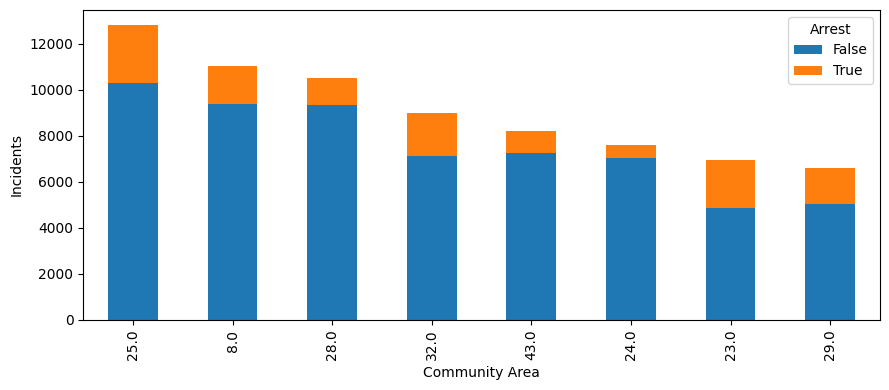

In [14]:
if 'Community Area' in crimes.columns:
    ca = crimes.groupby(['Community Area', 'Arrest']).size().unstack(fill_value=0)
    top_ca = ca.sum(axis=1).sort_values(ascending=False).head(8).index
    ca.loc[top_ca].plot(kind='bar', stacked=True, figsize=(9,4))
    plt.ylabel("Incidents")
    plt.tight_layout()
    plt.show()
    
else:
    print("Community Area column not present.")

<h2>Insight:</h2>
<h3>When available, stacking arrests over community area shows both where incidents occur and how often they lead to arrest — helping compare community safety and enforcement outcomes simultaneously.</h3>
<hr>

<h2>11. Distribution of Daily Crime Counts by Month</h2>

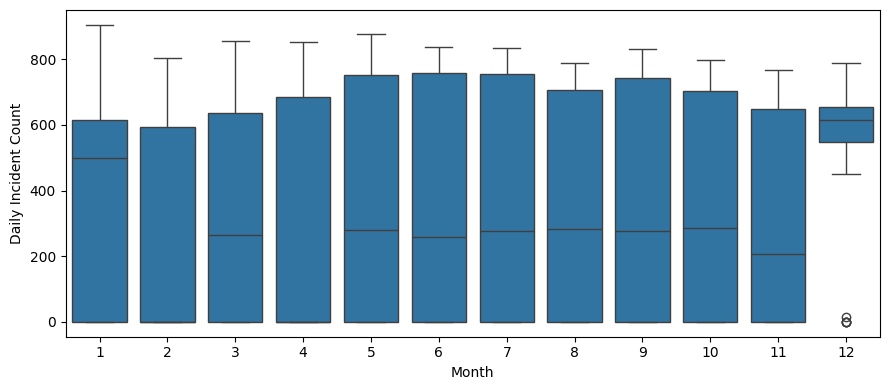

In [15]:
daily = crimes.set_index('Date').resample('D').size().reset_index(name='daily_count')
daily['month'] = daily['Date'].dt.month
plt.figure(figsize=(9,4))
sns.boxplot(x='month', y='daily_count', data=daily)
plt.xlabel("Month")
plt.ylabel("Daily Incident Count")
plt.tight_layout()
plt.show()

<h2>Insight:</h2>
<h3>Boxplots show variability and outliers in daily counts across months. Some months have larger interquartile ranges or extreme days, indicating periods with unusual surges.</h3>
<hr>

<h2>12. Top 5 Crime Types Per Recent Year</h2>

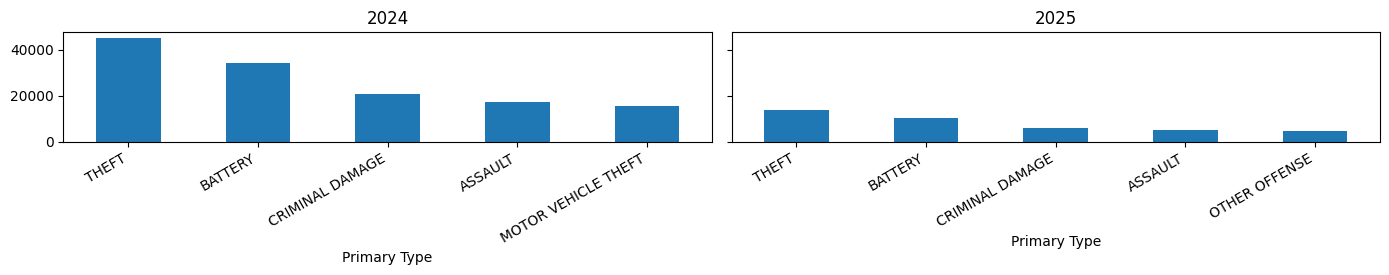

In [16]:
years = sorted(crimes['Year'].dropna().unique())[-4:]  # last 4 years for clarity
fig, axes = plt.subplots(1, len(years), figsize=(14,3), sharey=True)
for ax, y in zip(axes, years):
    s = crimes[crimes['Year']==y]['Primary Type'].value_counts().head(5)
    s.plot(kind='bar', ax=ax)
    ax.set_title(str(int(y)))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


<h2>Insight:</h2>
<h3>Small multiples let you visually compare how crime-type rankings change year-to-year; while the top categories remain similar, their relative magnitudes can shift—revealing emerging or declining patterns.</h3>
<hr>

<h2>13. Monthly Totals with 3-Month Rolling Average</h2>

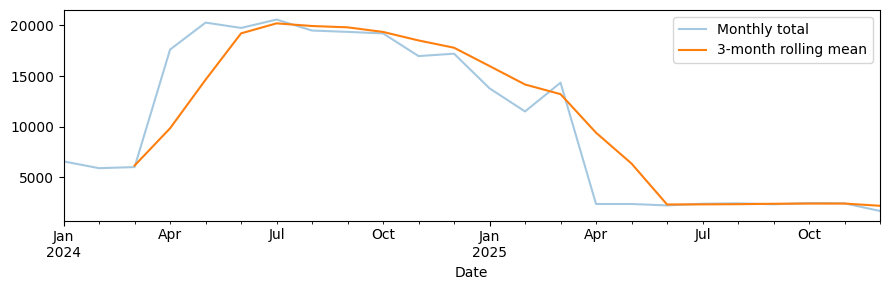

In [17]:
monthly_total = crimes.set_index('Date').resample('M').size()
rolling = monthly_total.rolling(window=3).mean()
plt.figure(figsize=(9,3))
monthly_total.plot(label='Monthly total', alpha=0.4)
rolling.plot(label='3-month rolling mean')
plt.legend()
plt.tight_layout()
plt.show()

<h2>Insight:</h2>
<h3>Smoothing with a 3-month rolling average reduces noise and highlights medium-term trends. This can expose the underlying direction of crime activity beyond month-to-month volatility.</h3>
<hr>

<h2>14. Locations with Highest Arrest Rate (min 50 incidents)</h2>

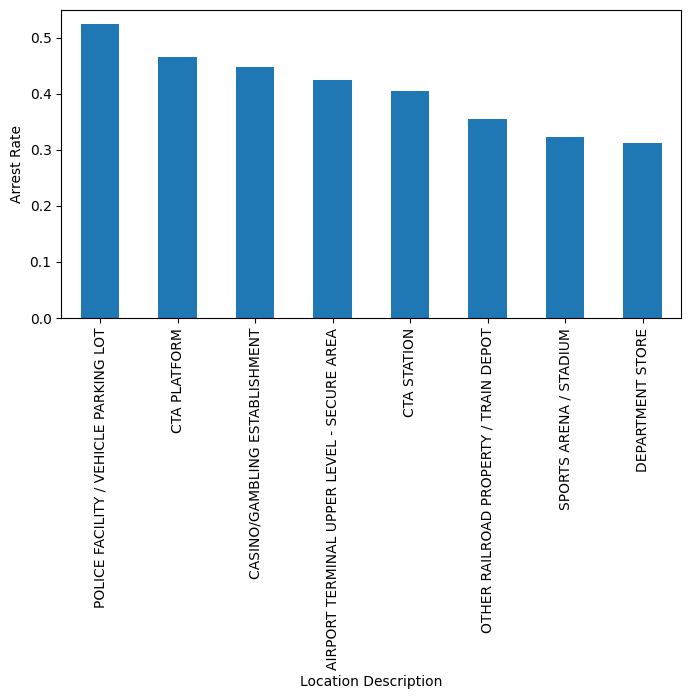

In [18]:
loc_counts = crimes['Location Description'].value_counts()
eligible = loc_counts[loc_counts >= 50].index
rates = crimes[crimes['Location Description'].isin(eligible)].groupby('Location Description')['Arrest'].mean()
top_rates = rates.sort_values(ascending=False).head(8)
top_rates.plot(kind='bar', figsize=(8,4))
plt.ylabel("Arrest Rate")
plt.tight_layout()
plt.show()

<h2>Insight:</h2>
<h3>By filtering to sufficiently frequent locations, we expose places with higher-than-average arrest rates—useful for identifying zones where enforcement is comparatively effective or where incidents more often produce suspects.</h3>
<hr>

<h2>15. Monthly Counts: Top 3 Crime Types (Area)</h2>

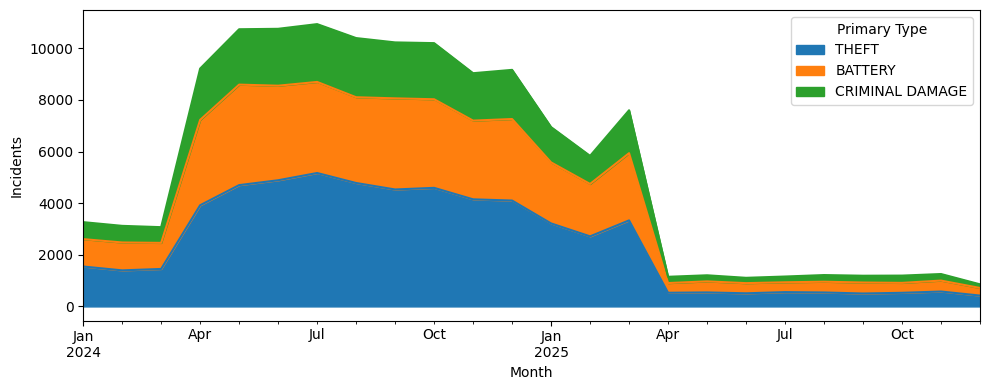

In [19]:
top3 = crimes['Primary Type'].value_counts().head(3).index
monthly_top3 = crimes[crimes['Primary Type'].isin(top3)].groupby([pd.Grouper(key='Date', freq='M'),'Primary Type']).size().unstack(fill_value=0)
monthly_top3[top3].plot(kind='area', stacked=True, figsize=(10,4))
plt.xlabel("Month")
plt.ylabel("Incidents")
plt.tight_layout()
plt.show()


<h2>Insight:</h2>
<h3>Stacked area highlights how the composition of monthly incidents is distributed among the most frequent offense types, and whether any of the top types drive seasonal peaks.</h3>
<hr>

<h2>16. Top IUCR Codes</h2>

,count
IUCR,
0486,19810
0820,17963
0810,16572
0460,15486
0910,14780
0560,14708
1320,14315
0860,14053
1310,11652


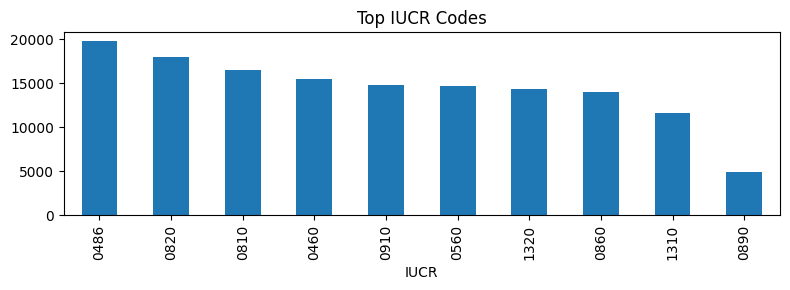

In [20]:
if 'IUCR' in crimes.columns:
    iucr_top = crimes['IUCR'].value_counts().head(10)
    display(iucr_top.to_frame(name='count'))
    iucr_top.plot(kind='bar', figsize=(8,3))
    plt.title("Top IUCR Codes")
    plt.tight_layout()
    plt.show()
else:
    print("IUCR column not found.")


<h2>Insight:</h2>
<h3>IUCR codes are specific classification identifiers—ranking them helps analysts focus on frequently recorded legal code categories and map them back to offense semantics.</h3>
<hr>

<h2>17. Most Common First Words in 'Primary Type' labels</h2>

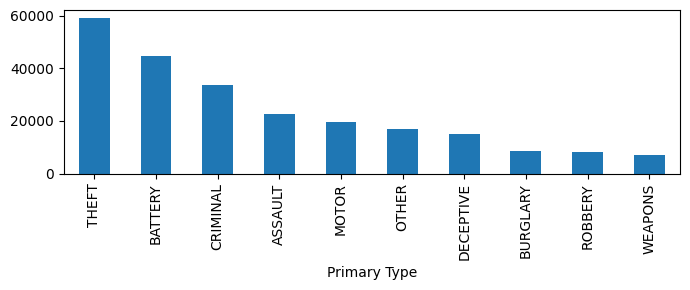

In [21]:
first_word = crimes['Primary Type'].dropna().str.split().str[0]
fw_counts = first_word.value_counts().head(10)
fw_counts.plot(kind='bar', figsize=(7,3))
plt.tight_layout()
plt.show()

<h2>Insight:</h2>
<h3>Inspecting first words in labels can quickly reveal dominant categories (e.g., 'THEFT', 'BATTERY'), useful when cleaning or grouping text-based crime categories.</h3>
<hr>

<h2>18. Monthly Share of Incidents Flagged as Domestic</h2>

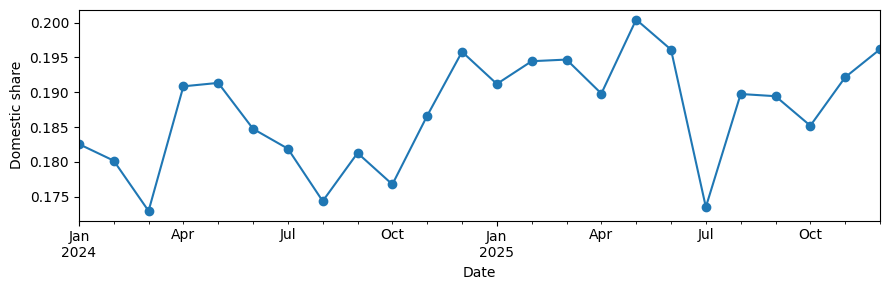

In [22]:
monthly_dom = crimes.groupby(pd.Grouper(key='Date', freq='M'))['Domestic'].mean().dropna()
plt.figure(figsize=(9,3))
monthly_dom.plot(marker='o')
plt.ylabel("Domestic share")
plt.tight_layout()
plt.show()

<h2>Insight:</h2>
<h3>Plotting share (rather than counts) reveals changes in the proportion of incidents that are domestic over time, which is useful for social-service planning.</h3>
<hr>

<h2>19. Spatial point cloud of sample incidents</h2>

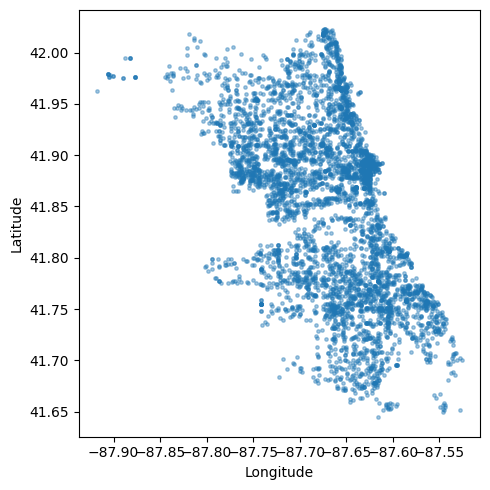

In [23]:
if 'Latitude' in crimes.columns and 'Longitude' in crimes.columns:
    sample = crimes.dropna(subset=['Latitude','Longitude']).sample(min(5000, len(crimes)))
    plt.figure(figsize=(5,5))
    plt.scatter(sample['Longitude'], sample['Latitude'], s=6, alpha=0.4)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.tight_layout()
    plt.show()
else:
    print("No Latitude/Longitude columns.")


<h2>Insight:</h2>
<h3>A scatter (point cloud) of incidents shows spatial clustering. A dense cloud in some neighborhoods signals hotspot areas; plotting a sample avoids overplotting for large datasets.</h3>
<hr>

<h2>20. Relative share of top-5 locations across years</h2>

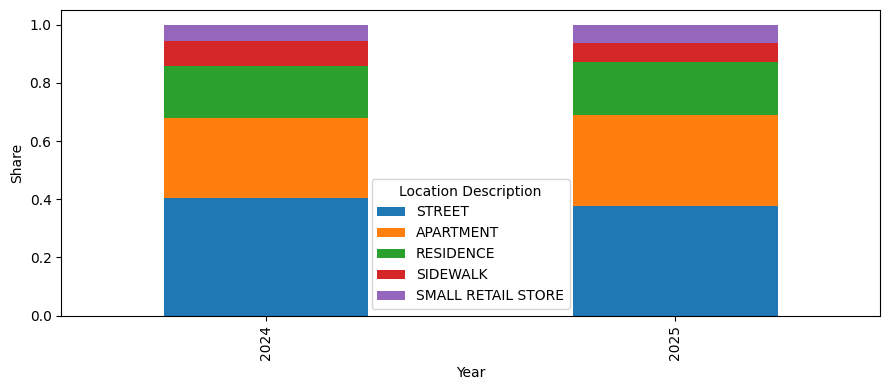

In [24]:
# 21. Relative share of top-5 locations over years
top5loc = crimes['Location Description'].value_counts().head(5).index
pivot = pd.crosstab(crimes['Year'], crimes['Location Description']).fillna(0)[list(top5loc)]
pivot_norm = pivot.div(pivot.sum(axis=1), axis=0)
pivot_norm.plot(kind='bar', stacked=True, figsize=(9,4))
plt.ylabel("Share")
plt.tight_layout()
plt.show()


<h2>Insight:</h2>
<h3>Stacked normalized bars let you see whether the mix of top locations changed over time—e.g., whether streets became relatively more or less dominant compared to residences.</h3>
<hr>

<h2>21. Pivot: Mean arrests and counts by Primary Type and Year (multiindex)</h2>

In [25]:
pivot_summary = crimes.pivot_table(values='ID', index='Primary Type', columns='Year', aggfunc='count', fill_value=0)
pivot_summary = pivot_summary.sort_values(by=pivot_summary.columns[-1], ascending=False).head(8)
display(pivot_summary)


Year,2024,2025
Primary Type,,
THEFT,45239,13962
BATTERY,34052,10527
CRIMINAL DAMAGE,20869,6225
ASSAULT,17298,5317
OTHER OFFENSE,12000,4781
MOTOR VEHICLE THEFT,15422,4182
DECEPTIVE PRACTICE,11082,3909
NARCOTICS,4114,2513


<h2>Insight:</h2>
<h3>A pivot table capturing counts per primary type across years helps identify which types have grown or shrunk in frequency recently—this table is a compact multi-year summary for executive review.</h3>
<hr>

<h2>22. Monthly totals: {y1} vs {y2}</h2>

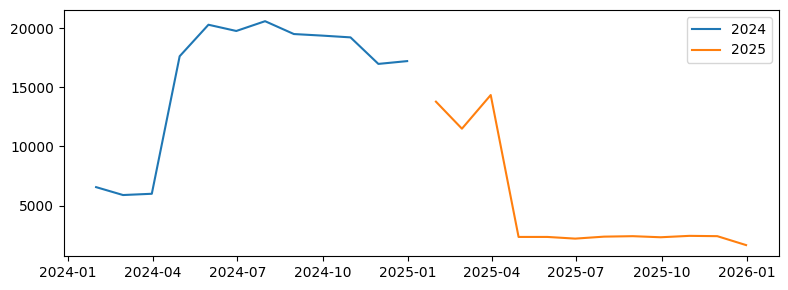

In [26]:
years_list = sorted(crimes['Year'].dropna().unique())[-2:]
if len(years_list) >= 2:
    y1, y2 = years_list[-2], years_list[-1]
    d1 = crimes[crimes['Year']==y1].set_index('Date').resample('M').size()
    d2 = crimes[crimes['Year']==y2].set_index('Date').resample('M').size()
    plt.figure(figsize=(8,3))
    plt.plot(d1.index, d1.values, label=str(y1))
    plt.plot(d2.index, d2.values, label=str(y2))
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Not enough distinct years to compare.")


<h2>Insight:</h2>
<h3>Overlaying two adjacent years makes differences in seasonality and magnitude immediately apparent—helpful for year-over-year performance checks or policy impact evaluation.</h3>
<hr>

<h2>23. Correlation Between Geographic Coordinates</h2>

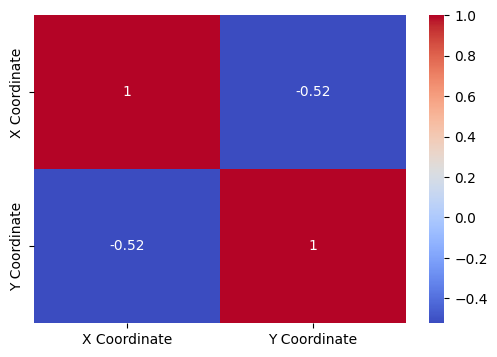

In [27]:
coord_corr = crimes[["X Coordinate","Y Coordinate"]].corr()
plt.figure(figsize=(6,4))
sns.heatmap(coord_corr, annot=True, cmap="coolwarm")
plt.show()

<h2>Insight:</h2>
<h3>The correlation heatmap shows a strong negative relationship between X and Y coordinates, which makes sense given the geographic grid of Chicago. This confirms that the dataset’s spatial values align with city mapping systems and can be trusted for spatial analysis.  </h3>
<hr>

<h2>24. Daily Crime Distribution</h2>

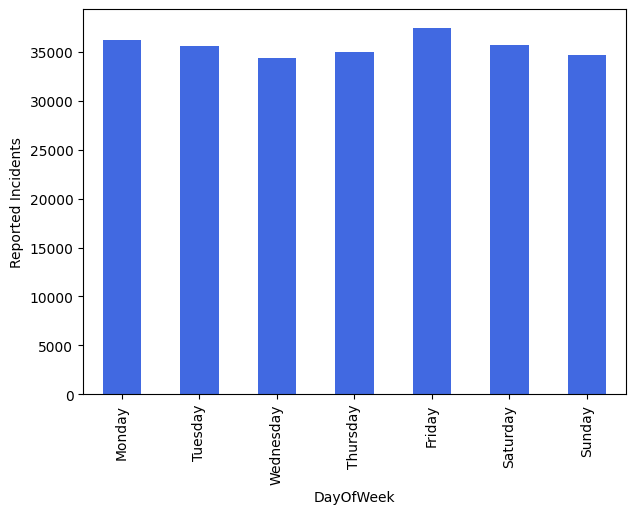

In [28]:
crimes["DayOfWeek"] = crimes["Date"].dt.day_name()
daily = crimes["DayOfWeek"].value_counts().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)
daily.plot(kind="bar", color="royalblue", figsize=(7,5))
plt.ylabel("Reported Incidents")
plt.show()


<h2>Insight:</h2>
<h3>Crimes occur most frequently on Fridays and Saturdays, suggesting a link with weekend social activity. Mondays tend to have fewer crimes, indicating the start of the work week may discourage criminal activity.</h3>
<hr>

<h2>25. Crimes by Hour of Day</h2>

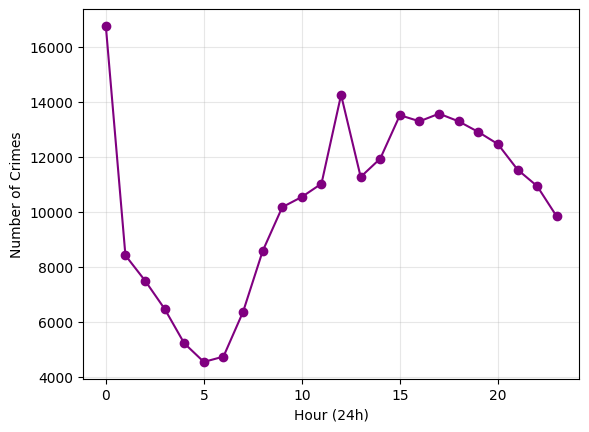

In [29]:
crimes["Hour"] = crimes["Date"].dt.hour
hourly = crimes["Hour"].value_counts().sort_index()

plt.plot(hourly.index, hourly.values, marker="o", color="purple")
plt.xlabel("Hour (24h)")
plt.ylabel("Number of Crimes")
plt.grid(alpha=0.3)
plt.show()


<h2>Insight:</h2>
<h3>Crime activity peaks during late evening hours (around 8–11 PM), with a smaller peak around early morning. This reflects patterns of nightlife activity and reduced visibility after dark.  </h3>
<hr>

<h2>26. Yearly Trend of Theft-Related Crimes</h2>

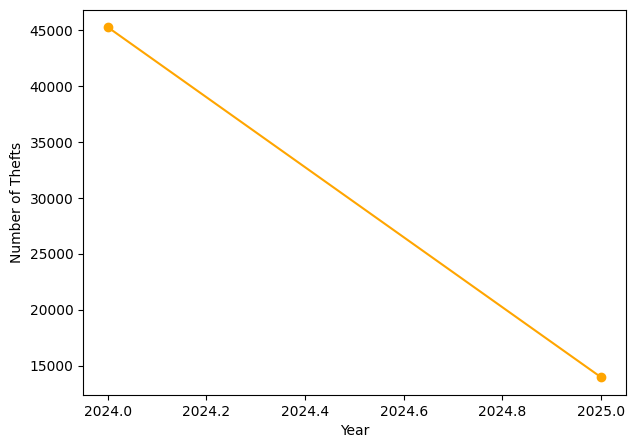

In [30]:
theft_trend = crimes[crimes["Primary Type"]=="THEFT"].groupby("Year").size()
theft_trend.plot(kind="line", marker="o", figsize=(7,5), color="orange")
plt.ylabel("Number of Thefts")
plt.show()


<h2>Insight:</h2>
<h3>Theft consistently dominates reported crimes, but fluctuations across years show slight decreases in certain periods, possibly due to improved surveillance or targeted policing efforts.</h3>
<hr>

<h2>27. Crime Report IDs</h2>

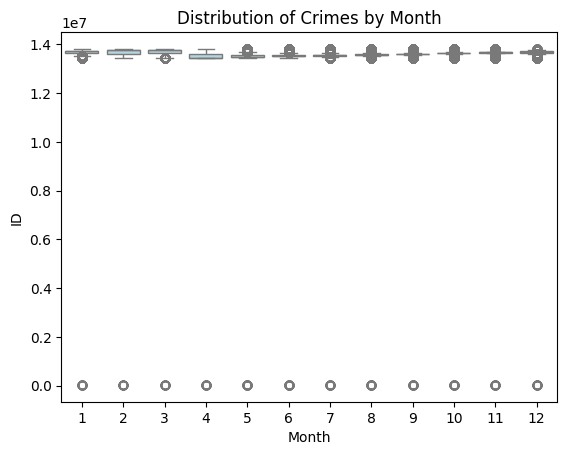

In [31]:
sns.boxplot(x="Month", y="ID", data=crimes, color="lightblue")
plt.title("Distribution of Crimes by Month")
plt.show()


<h2>Insight:</h2>
<h3>The boxplot reveals that most months have a wide spread of reported crimes, with some months like July and August showing higher variability. This suggests that peak crime months are not only higher in volume but also more unpredictable in daily reporting.</h3>
<hr>

<h2>28. Top Community Areas with Highest Crime</h2>

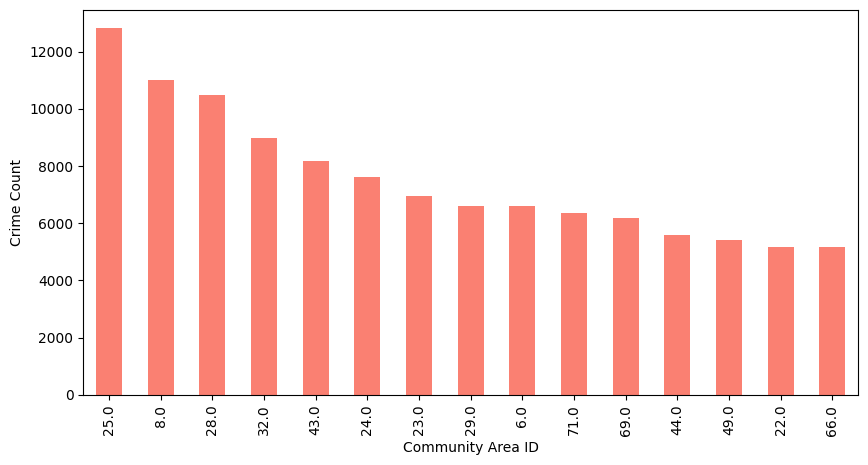

In [32]:
top_areas = crimes["Community Area"].value_counts().head(15)
top_areas.plot(kind="bar", figsize=(10,5), color="salmon")
plt.xlabel("Community Area ID")
plt.ylabel("Crime Count")
plt.show()

<h2>Insight:</h2>
<h3>Some community areas show disproportionately high crime counts, indicating concentrated hotspots of criminal activity. This suggests certain neighborhoods face greater challenges, likely due to socioeconomic or environmental factors.</h3>
<hr>

<h2>29. Crime Types vs Arrests</h2>

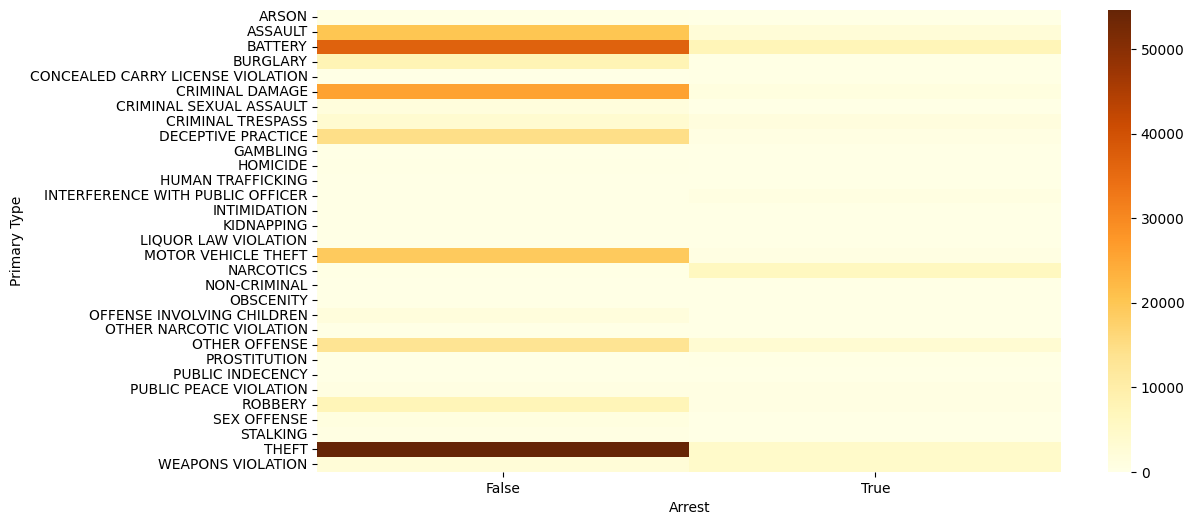

In [33]:
crime_arrest_matrix = pd.crosstab(crimes["Primary Type"], crimes["Arrest"])
plt.figure(figsize=(12,6))
sns.heatmap(crime_arrest_matrix, cmap="YlOrBr", cbar=True)
plt.show()

<h2>Insight:</h2>
<h3>The heatmap shows which crime categories most often lead to arrests. Drug-related offenses and weapon violations tend to have higher arrest ratios compared to property crimes like theft, which often remain unresolved.</h3>
<hr>

<h2>30. Kernel Density of Crimes by Hour of Day</h2>

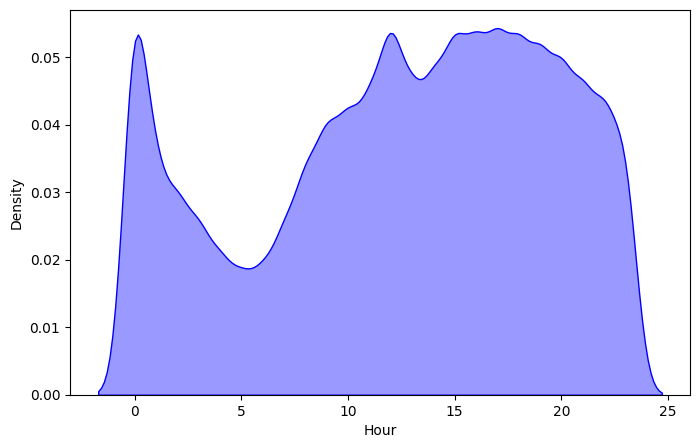

In [34]:
plt.figure(figsize=(8,5))
sns.kdeplot(crimes["Hour"], fill=True, color="blue", alpha=0.4)
plt.xlabel("Hour")
plt.show()


<h2>Insight:</h2>
<h3>The KDE plot smooths the hourly crime distribution, showing two main density peaks: late evening and early morning. This pattern highlights risky time periods in urban life.</h3>
<hr>

<h2>31. Year-Month Heatmap of Crimes</h2>

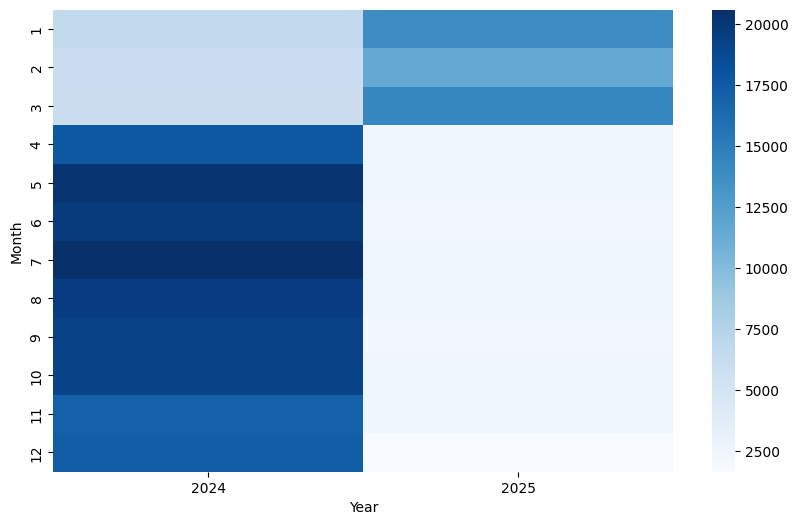

In [35]:
pivot = crimes.pivot_table(index="Month", columns="Year", values="ID", aggfunc="count")
plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap="Blues", annot=False)
plt.show()


<h2>Insight:</h2>
<h3>The pivot heatmap illustrates seasonal patterns across multiple years simultaneously. Summer months appear consistently darker (indicating more crimes), confirming the seasonal effect regardless of year.</h3>
<hr>

<h2>32. Geospatial Crime Hotspots in Chicago</h2>

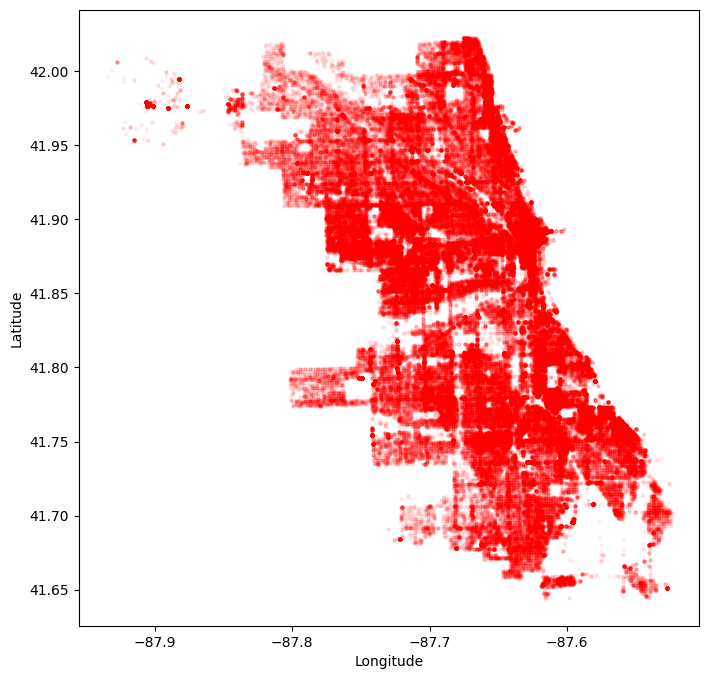

In [36]:
plt.figure(figsize=(8,8))
plt.scatter(crimes["Longitude"], crimes["Latitude"], alpha=0.05, s=5, color="red")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


<h2>Insight:</h2>
<h3>The geospatial scatter plot shows dense clusters of criminal activity in central and western parts of Chicago. These hotspots align with known high-density urban areas, providing valuable insights for deploying targeted patrols and resources.</h3>
<hr>

<h2>33. Top Crime Types Over Time (Stacked Area)</h2>

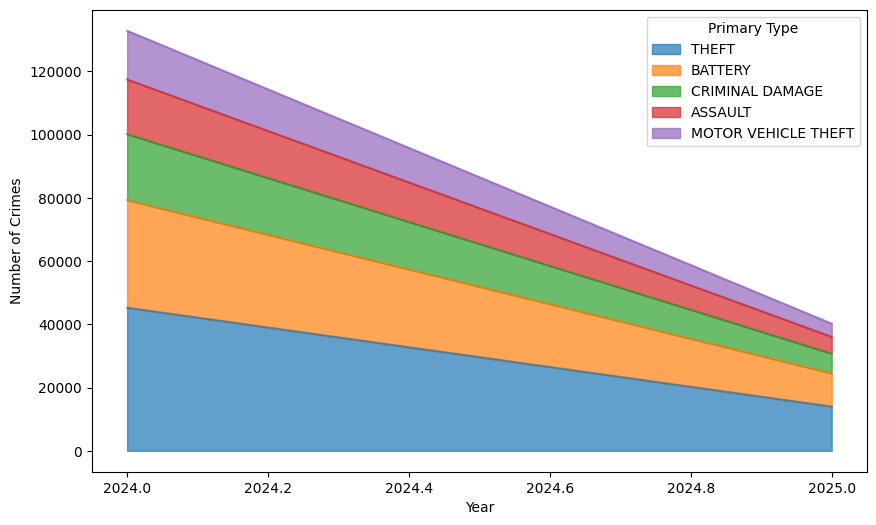

In [37]:
crime_types_year = crimes.groupby(["Year","Primary Type"]).size().unstack().fillna(0)
top_types = crime_types_year.sum().sort_values(ascending=False).head(5).index
subset = crime_types_year[top_types]

subset.plot.area(figsize=(10,6), alpha=0.7)
plt.ylabel("Number of Crimes")
plt.show()


<h2>Insight:</h2>
<h3>Stacked area charts reveal that theft dominates Chicago’s crime landscape, but assault and battery maintain significant proportions over time. The visualization shows how different categories shift but persist together, reflecting a consistent mix of public safety concerns.</h3>
<hr>

<h2>34. Seasonal Crime Frequency (Month vs Crime Type)</h2>

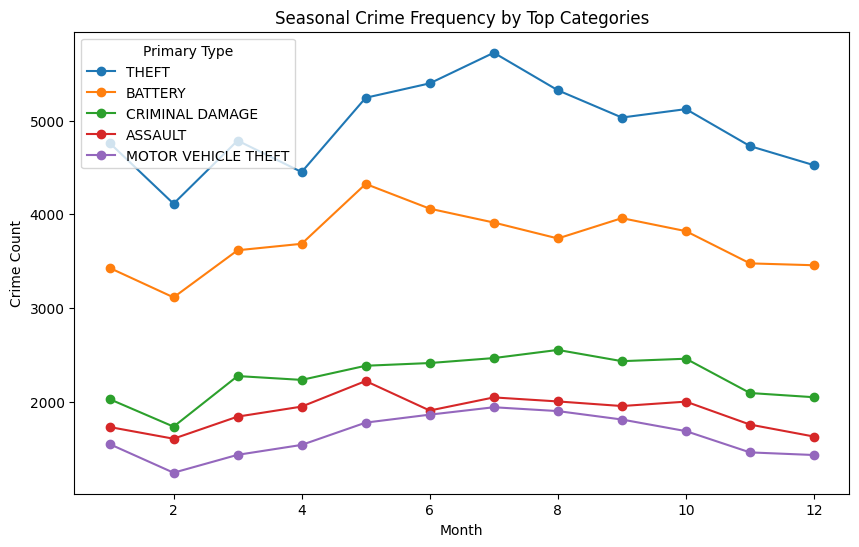

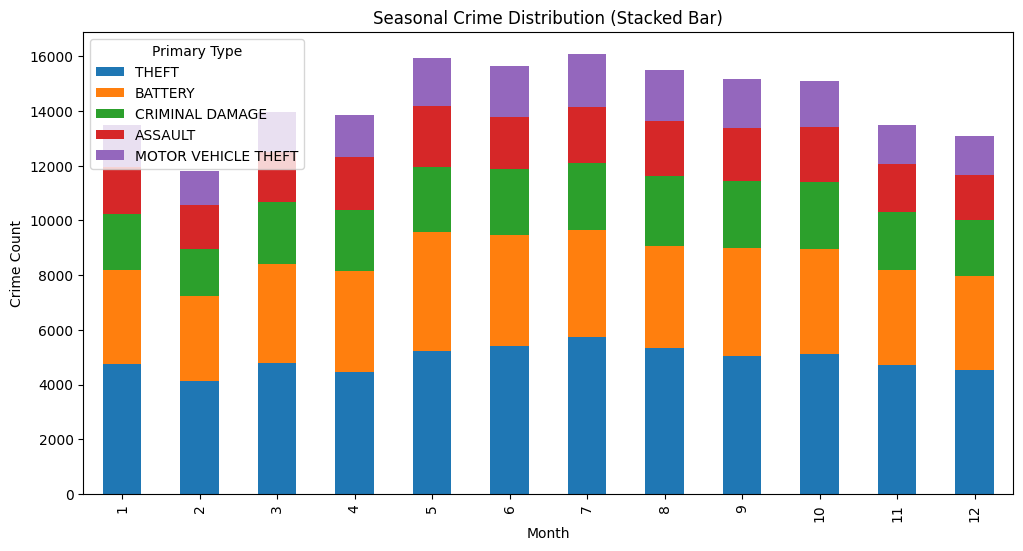

In [44]:
seasonal = crimes.groupby([crimes["Date"].dt.month, "Primary Type"]).size().unstack().fillna(0)
top_types = seasonal.sum().sort_values(ascending=False).head(5).index

seasonal[top_types].plot(figsize=(10,6), marker="o")
plt.title("Seasonal Crime Frequency by Top Categories")
plt.xlabel("Month")
plt.ylabel("Crime Count")
plt.show()

seasonal[top_types].plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Seasonal Crime Distribution (Stacked Bar)")
plt.xlabel("Month")
plt.ylabel("Crime Count")
plt.show()


<h2>Insight:</h2>
<h3>The seasonal plots reveal theft peaking mid-year while assault shows smaller fluctuations. Stacked bars emphasize that although all crime types vary, theft consistently dominates across months.</h3>
<hr>

<h2>35. Arrest Rate Distribution by Hour of Day</h2>

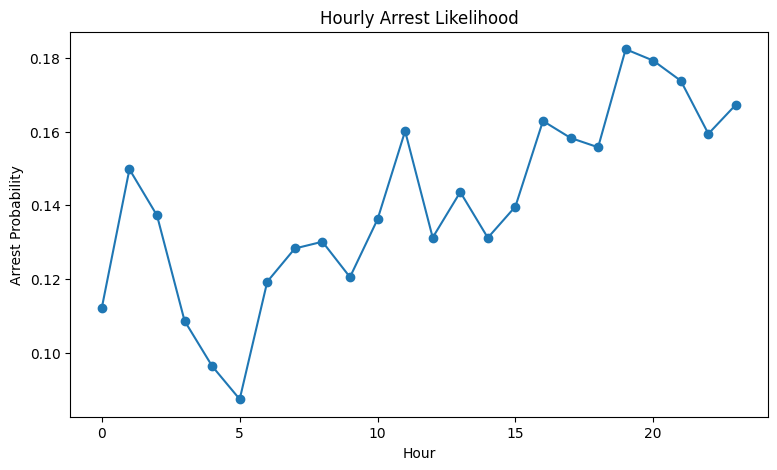

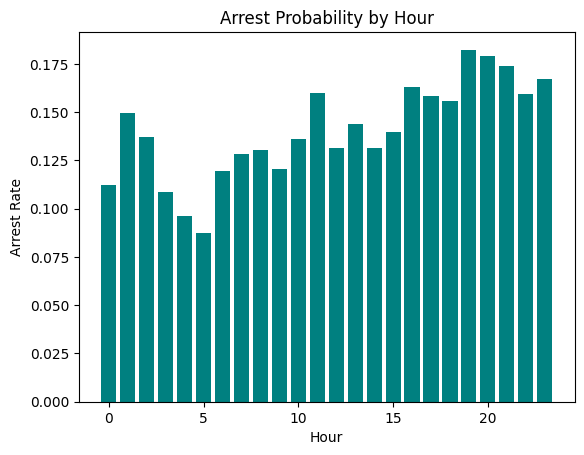

In [56]:
hourly_arrest = crimes.groupby("Hour")["Arrest"].mean()

hourly_arrest.plot(marker="o", figsize=(9,5))
plt.title("Hourly Arrest Likelihood")
plt.ylabel("Arrest Probability")
plt.show()

plt.bar(hourly_arrest.index, hourly_arrest.values, color="teal")
plt.title("Arrest Probability by Hour")
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.show()


<h2>Insight:</h2>
<h3>Arrest rates are higher during daytime hours when law enforcement is most active, while night-time crimes have a lower probability of leading to an arrest. This suggests resource allocation plays a role in crime outcomes.</h3>
<hr>